# Analyzing and Visualizing Movie Ratings

#### 🔧 Step 1: Import Libraries and Load Dataset

In [50]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline
%matplotlib inline

In [51]:
# Step 2: Load dataset
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/EDA project/IMDB-Movie-Data.csv")

In [52]:
# Display first few rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [53]:
# Display last few rows
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


#### 🧹 Step 2: Data Cleaning and Preprocessing

In [54]:
# Shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (1000, 12)


In [55]:
# Check column names
print("Columns:", df.columns)

Columns: Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [56]:
# Info about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [59]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


In [60]:
# Fill missing numerical values with mean
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace=True)
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)

In [62]:
# Verify no missing values
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [63]:
# Summary statistics for all numerical columns
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


#### 📊 Step 3: Summary statistics (mean, median, mode) of ratings

In [64]:
# Specifically for Rating
rating_mean = df['Rating'].mean()
rating_median = df['Rating'].median()
rating_mode = df['Rating'].mode()[0]

print(f"Mean Rating: {rating_mean:.2f}")
print(f"Median Rating: {rating_median}")
print(f"Mode Rating: {rating_mode}")

Mean Rating: 6.72
Median Rating: 6.8
Mode Rating: 7.1


#### 📈 Step 4: Visualizations — Distribution of Ratings

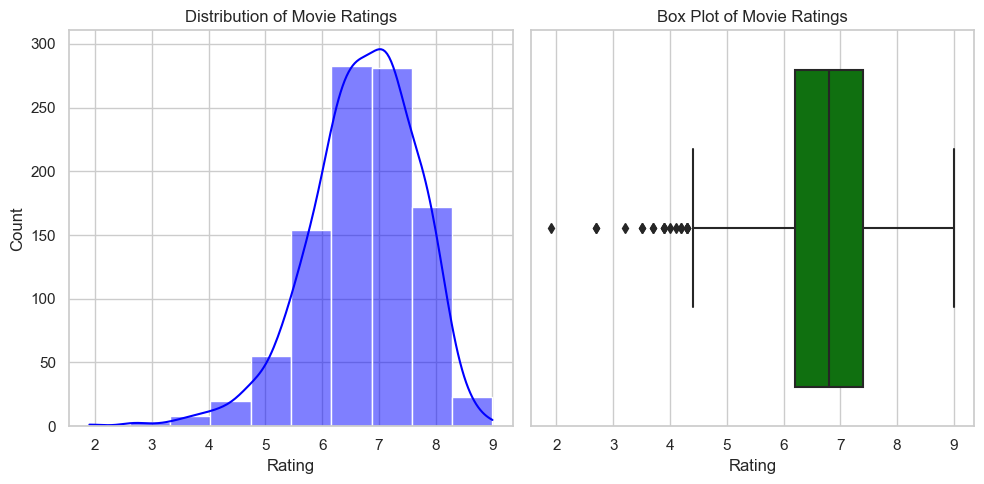

In [116]:
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'], color='Green')
plt.title('Box Plot of Movie Ratings')

plt.tight_layout()
plt.show()

<Axes: xlabel='Revenue (Millions)', ylabel='Rating'>

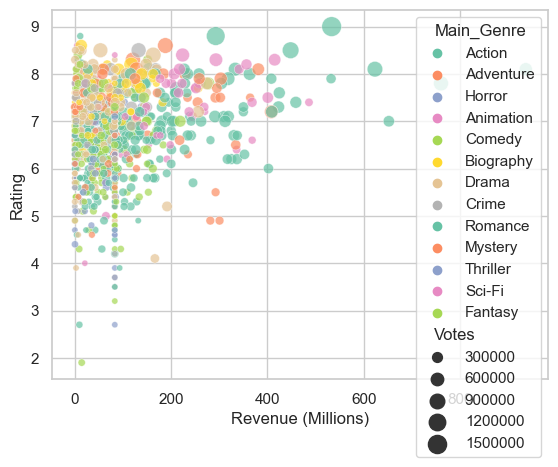

In [119]:
# Scatter Plot: Rating vs Revenue
sns.scatterplot(data=df,x='Revenue (Millions)',y='Rating',hue='Main_Genre',size='Votes',sizes=(20, 200),alpha=0.7,palette='Set2')

#### ⭐ Step 5: Identify Top-Rated Movies and Genres

In [90]:
# Top 10 Movies by Rating
top_movies = df.sort_values(by='Rating', ascending=False)[['Title', 'Rating', 'Genre']].head(10)
print("🎬 Top 10 Movies by Rating:")
print(top_movies)

🎬 Top 10 Movies by Rating:
                Title  Rating                    Genre
54    The Dark Knight     9.0       Action,Crime,Drama
80          Inception     8.8  Action,Adventure,Sci-Fi
117            Dangal     8.8   Action,Biography,Drama
36       Interstellar     8.6   Adventure,Drama,Sci-Fi
96      Kimi no na wa     8.6  Animation,Drama,Fantasy
249  The Intouchables     8.6   Biography,Comedy,Drama
133          Whiplash     8.5              Drama,Music
64       The Prestige     8.5     Drama,Mystery,Sci-Fi
99       The Departed     8.5     Crime,Drama,Thriller
991  Taare Zameen Par     8.5       Drama,Family,Music


In [91]:
# Average rating by Genre
# Some movies may have multiple genres separated by commas; let's take the first genre for simplicity
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

genre_rating = df.groupby('Main_Genre')['Rating'].mean().sort_values(ascending=False)
print("\n🎭 Average Rating by Genre:")
print(genre_rating)


🎭 Average Rating by Genre:
Main_Genre
Animation    7.324490
Biography    7.318750
Drama        6.954872
Adventure    6.908000
Mystery      6.876923
Crime        6.807042
Romance      6.600000
Action       6.592491
Comedy       6.493143
Thriller     5.960000
Horror       5.867391
Fantasy      5.850000
Sci-Fi       4.966667
Name: Rating, dtype: float64


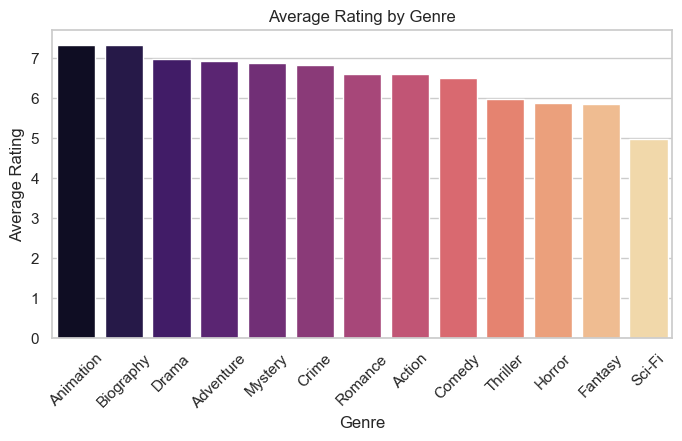

In [126]:
# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


#### 📊 Step 6: Simple Dashboard (Using Matplotlib Subplots)

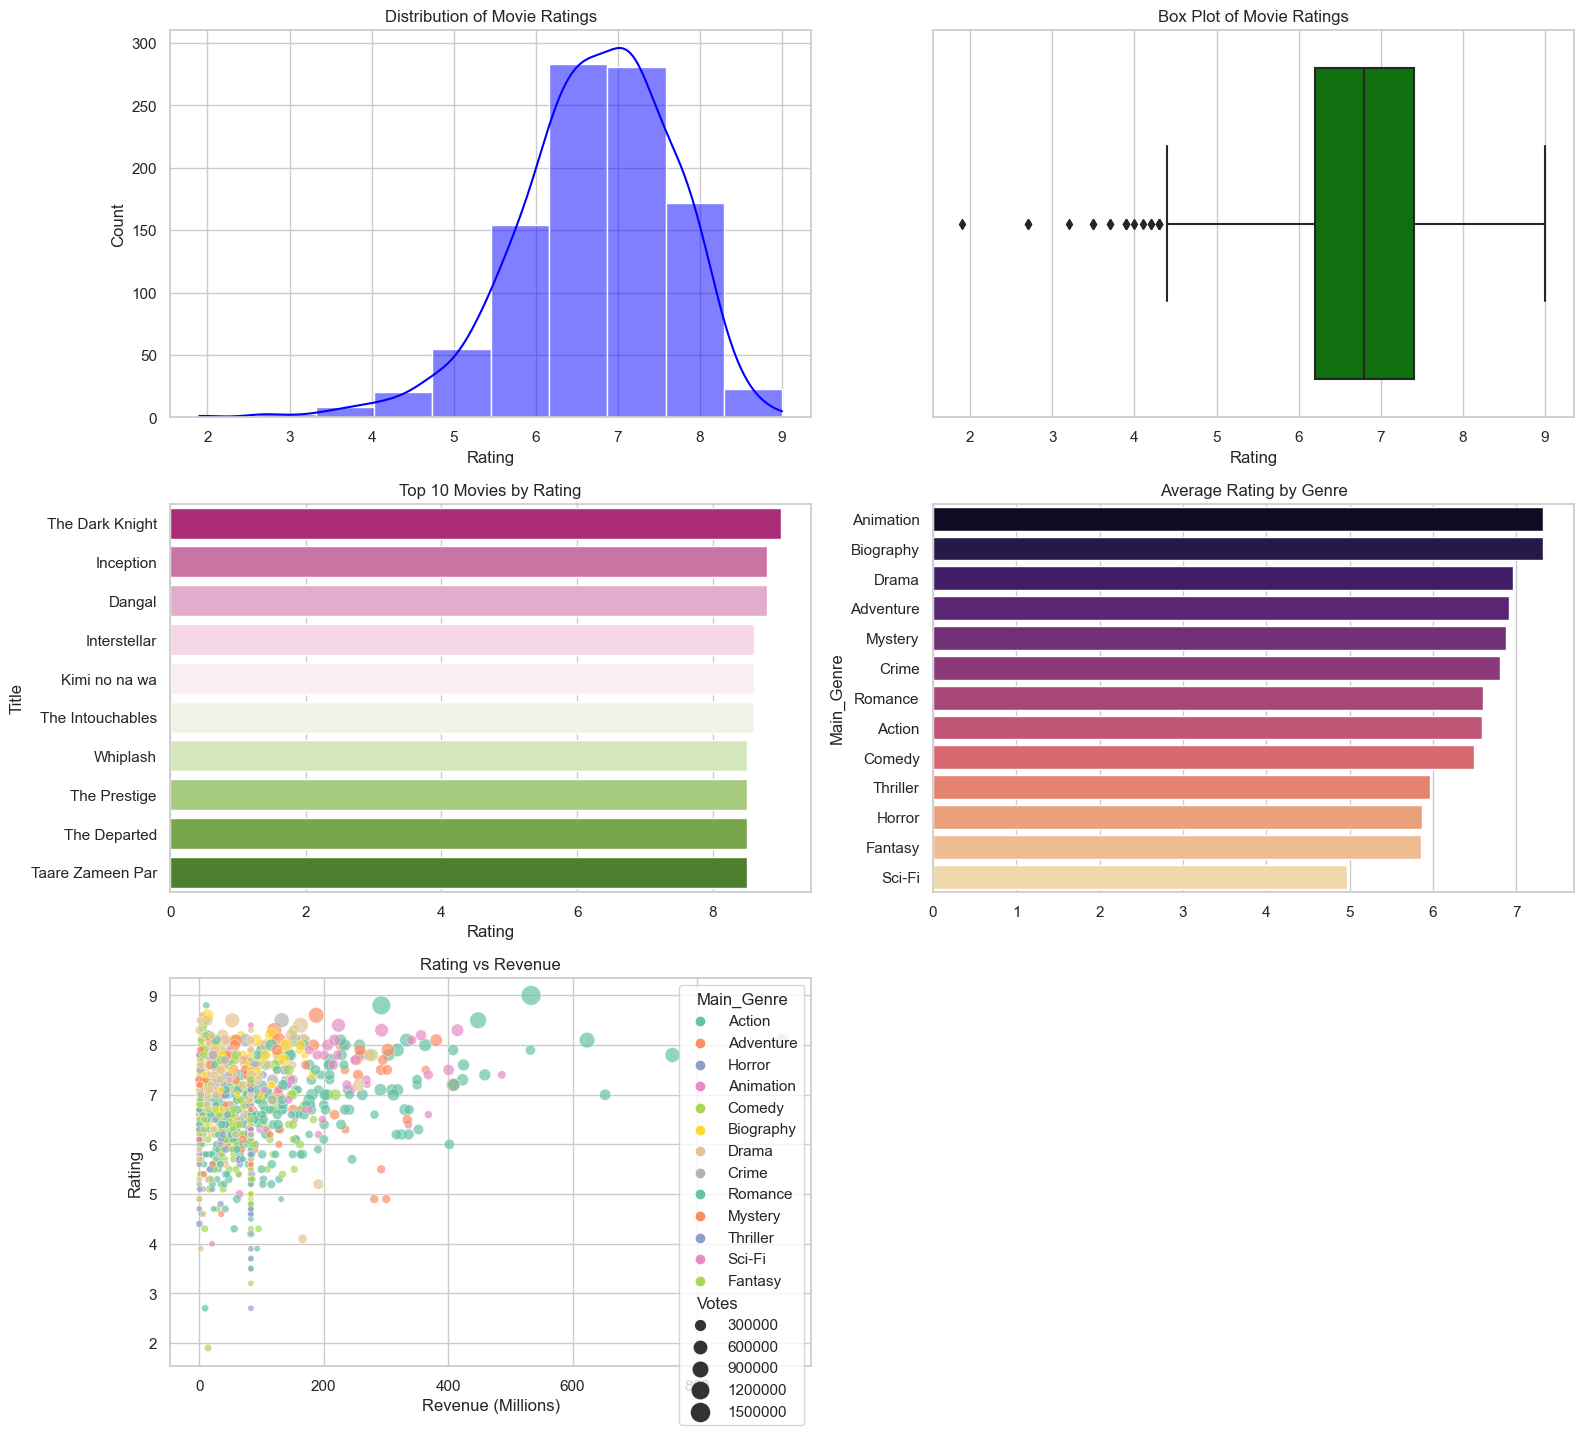

In [125]:
fig, axes = plt.subplots(3, 2, figsize=(16,15))

# Rating distribution
sns.histplot(df['Rating'], bins=10, kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title('Distribution of Movie Ratings')

# Box plot
sns.boxplot(x=df['Rating'], ax=axes[0,1], color='green')
axes[0,1].set_title('Box Plot of Movie Ratings')

# Top movies
sns.barplot(x='Rating', y='Title', data=top_movies, ax=axes[1,0], palette='PiYG')
axes[1,0].set_title('Top 10 Movies by Rating')

# Average rating by Genre
sns.barplot(x=genre_rating.values, y=genre_rating.index, ax=axes[1,1], palette='magma')
axes[1,1].set_title('Average Rating by Genre')

# Scatter Plot: Rating vs Revenue
sns.scatterplot(data=df, 
                x='Revenue (Millions)', 
                y='Rating', 
                hue='Main_Genre', 
                size='Votes', 
                sizes=(20, 200), 
                alpha=0.7, 
                palette='Set2', 
                ax=axes[2,0])
axes[2,0].set_title('Rating vs Revenue')

# Remove empty subplot (if you want)
fig.delaxes(axes[2,1])  # optional

plt.tight_layout()
plt.show()
